In [1]:
import glob
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import mdshare
#import pyemma
from tqdm.notebook import tqdm
from matplotlib import rc
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

nn=np.linspace(-1,3)

In [3]:
data = []
lendata = []

#Loop through the directories containing the paths
for directory in glob.glob("./run*",recursive=True):
    print("Directory",directory)
    #Loop through the paths
    pathname=directory+"/CVscreeningeneptm.dat"
    print(directory,pathname)
    for file in glob.glob(pathname):      
        inp = np.loadtxt(file, skiprows=2,usecols=np.arange(0,18))
        data.append(inp)
        lendata.append(len(inp))

# Data concatenated
Data = np.concatenate(data)
Data = np.delete(Data,0,1)
numCVs = Data.shape[1]
#datalabels = ["cn.mean","ncl","ncs","Q4.mean","q4.mean","ncnq4","laQ4.mean","Q6.mean","q6.mean","ncnq6","laQ6.mean","ent","nclust1", "ene", "non", "fcc", "hcp", "bcc", "ico"]
datalabels = ["cn.mean","ncl","ncs","Q4.mean","q4.mean","ncnq4","laQ4.mean","Q6.mean","q6.mean","ncnq6","laQ6.mean","ent","nclust1", "ene", "non", "fcc", "hcp"]

datalabels = ["cn.mean","ncl","ncs","Q4.mean","q4.mean","ncnq4","laQ4.mean","Q6.mean","q6.mean","ncnq6","laQ6.mean","ent","nclust1", "ene", "non", "fcc", "hcp"]
npdatalabels = np.array(["cn.mean","ncl","ncs","Q4.mean","q4.mean","ncnq4","laQ4.mean","Q6.mean","q6.mean","ncnq6","laQ6.mean","ent","nclust1", "ene", "non", "fcc", "hcp"])

numCVs = len(datalabels)

Directory ./run38N
./run38N ./run38N/CVscreeningeneptm.dat
Directory ./run39Y
./run39Y ./run39Y/CVscreeningeneptm.dat
Directory ./run99Y
./run99Y ./run99Y/CVscreeningeneptm.dat
Directory ./run612N
./run612N ./run612N/CVscreeningeneptm.dat
Directory ./run525Y
./run525Y ./run525Y/CVscreeningeneptm.dat
Directory ./run725N
./run725N ./run725N/CVscreeningeneptm.dat
Directory ./run733Y
./run733Y ./run733Y/CVscreeningeneptm.dat
Directory ./run17N
./run17N ./run17N/CVscreeningeneptm.dat
Directory ./run178Y
./run178Y ./run178Y/CVscreeningeneptm.dat
Directory ./run1005new
./run1005new ./run1005new/CVscreeningeneptm.dat
Directory ./run287Y
./run287Y ./run287Y/CVscreeningeneptm.dat
Directory ./run1006new
./run1006new ./run1006new/CVscreeningeneptm.dat
Directory ./run1007new
./run1007new ./run1007new/CVscreeningeneptm.dat
Directory ./run1008new
./run1008new ./run1008new/CVscreeningeneptm.dat
Directory ./run1002new-crystal
./run1002new-crystal ./run1002new-crystal/CVscreeningeneptm.dat


In [4]:
npdatalabels

array(['cn.mean', 'ncl', 'ncs', 'Q4.mean', 'q4.mean', 'ncnq4',
       'laQ4.mean', 'Q6.mean', 'q6.mean', 'ncnq6', 'laQ6.mean', 'ent',
       'nclust1', 'ene', 'non', 'fcc', 'hcp'], dtype='<U9')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


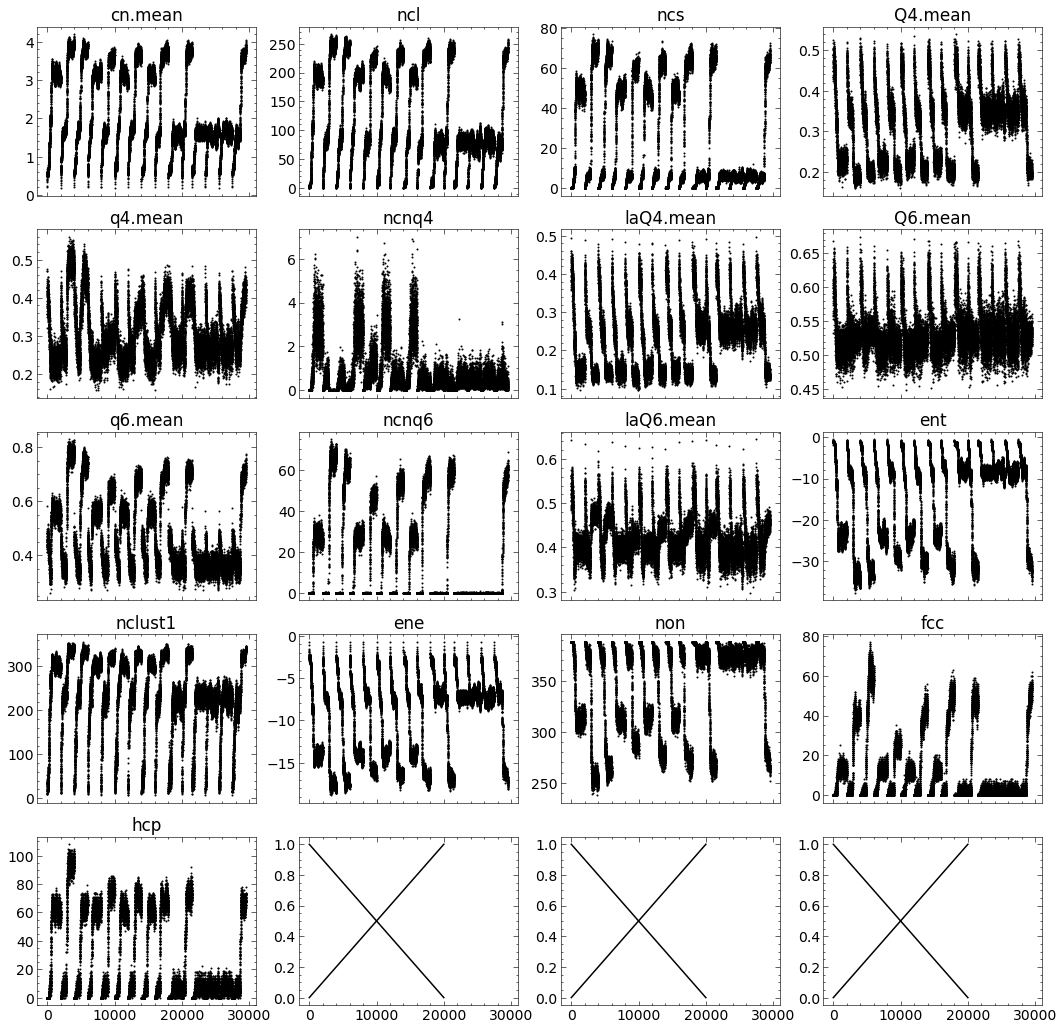

In [5]:
panels = int(np.sqrt(numCVs))+1
figure, axis = plt.subplots(panels, panels-1, figsize=(18,18), sharex=True)

cols = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C1']
c = 0
for i in range(0,panels):
    for j in range(0,panels-1):
        if c < numCVs:
            axis[i, j].plot(Data[0:-1:100,c],'ko',markersize=1)
            axis[i, j].set_title(format(datalabels[c]))
        else:
            axis[i, j].plot([0,20000],[1,0],'k-')
            axis[i, j].plot([0,20000],[0,1],'k-')
        c += 1

plt.show()
#plt.savefig('./CVsTimeseries.png', dpi=300, bbox_inches='tight')

1 ['ncs'] 1.9908973216183496 0.0006842574415792228
2 ['ncs' 'ncnq6'] 2.9419165817812676 0.002219083372984649
3 ['ncs' 'ncnq6' 'nclust1'] 3.861460336485628 0.005174019287018886
4 ['ncs' 'ncnq6' 'nclust1' 'fcc'] 4.531170624035631 0.028881845415821943
5 ['ncs' 'ncnq6' 'ent' 'ene' 'fcc'] 5.137959854264289 0.040634272607413015
6 ['ncl' 'ncs' 'ncnq6' 'ent' 'nclust1' 'fcc'] 5.409466677824254 0.03067178904392577
7 ['ncl' 'ncs' 'q4.mean' 'ncnq6' 'ent' 'nclust1' 'fcc'] 5.620909843774627 0.045913650059152294
8 ['ncl' 'ncs' 'q4.mean' 'laQ4.mean' 'ncnq6' 'ent' 'nclust1' 'fcc'] 5.793740810987673 0.08411312380712392
9 ['ncl' 'ncs' 'q4.mean' 'laQ4.mean' 'ncnq6' 'ent' 'nclust1' 'ene' 'fcc'] 5.968791219243713 0.03821747687815023
10 ['ncl' 'ncs' 'q4.mean' 'laQ4.mean' 'ncnq6' 'ent' 'nclust1' 'ene' 'fcc'
 'hcp'] 6.1070567442646935 0.05263643586042495
11 ['ncl' 'ncs' 'q4.mean' 'ncnq4' 'laQ4.mean' 'ncnq6' 'ent' 'nclust1' 'ene'
 'fcc' 'hcp'] 6.215831260397127 0.05942190037930902
12 ['ncl' 'ncs' 'q4.mean' 'ncn

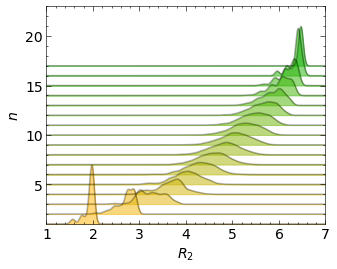

In [9]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.05, kernel='gaussian')
bins = np.arange(0,7,0.01)
c = 0
cmax = numCVs
numRCs = []

RC = np.full((numCVs, numCVs), 0, dtype=int)

plt.figure(figsize=(5,4)) 
for i in range(0,numCVs):
    cols=[1-c/cmax,0.7,0.0]
    
    file = "VAMP_CVs" + str(i+1) + ".txt.clean"
    #print(i,file)
    data = np.loadtxt(file, skiprows=1,dtype=None)
    
    # Count the combinations
    numRCs.append(data.shape[0])
    
    if i == numCVs-1:
        # Here I add an additional R2 value so that computing the distro doesn't cause issues
        values = np.array([data[i+1+1],-1*data[i+1+1]])
    else:           
        values = data[:,i+1+1]
    
    # Plot the distributions
    kde.fit(values[:, None])
    logprob = kde.score_samples(bins[:, None])
    plt.fill_between(bins[:], np.exp(logprob)[:]+i+1, i+1, color=cols, alpha=0.5)
    plt.plot(bins[:], np.exp(logprob)[:]+i+1, i+1, color='k', alpha=0.3)
    #######print(np.argwhere(np.exp(logprob)[:] == np.amax(np.exp(logprob)[:])))
    
    if i < numCVs-1:
        # Get the rankings
        data_rank = data[values.argsort()]
        rank_ints = data_rank[:,1:-2].astype(int)
    
        # Report an ordered list
        ofile = file + ".ranks"
        myfile = open(ofile, 'w')
        for j in range(0,rank_ints.shape[0]):

            order = rank_ints.shape[0] - j
            # have to create a string of cv labels to avoid problems.
            myfile.write("{} {} {} {} \n".format(order, npdatalabels[rank_ints[j][0:i+1]],data_rank[j,-2],data_rank[j,-1]))
    
        myfile.close()

        # Report the best CVs - ordered so final j
        print(i+1,npdatalabels[rank_ints[j][0:i+1]],data_rank[j,-2],data_rank[j,-1])
        #print(i+1,rank_ints[j],data_rank[j,-2])
        #print(data_rank[j,-2])
        RC[i,rank_ints[j]] = 1
    
    c += 1
    

plt.xlim(1,7)
plt.ylim(1,23)
plt.xlabel(r'$R_2$')
plt.ylabel(r'$n$')
plt.savefig('./vamp-dist.png', dpi=300, bbox_inches='tight')
plt.show()

### RC distribution

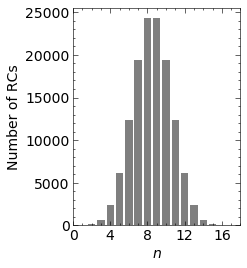

In [7]:
plt.figure(figsize=(3,4)) 
plt.bar(np.arange(1,len(numRCs)+1),numRCs, color='black', alpha=0.5)
plt.xticks(np.arange(0, 18, 4))
plt.xlim(0,18)
plt.xlabel(r'$n$')
plt.ylabel('Number of RCs')
plt.savefig('./CVNumcons.png', dpi=300, bbox_inches='tight')

### 1D RC histogram

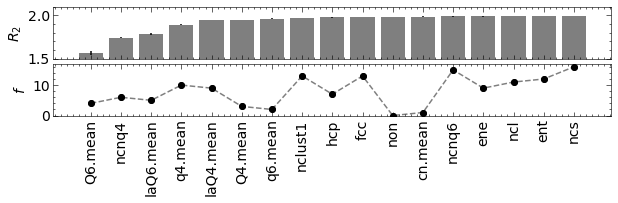

In [8]:
file = "VAMP_CVs1.txt.clean"
data = np.loadtxt(file, skiprows=1,dtype=None)
data_rank = data[data[:,2].argsort()]
rank_ints = data_rank[:,1:-2].astype(int)

CVcat = []
R2val = []
R2err = []

for j in range(0,rank_ints.shape[0]):

    order = rank_ints.shape[0] - j
    #print(order, datalabels[rank_ints[j][0]],data_rank[j,-2],data_rank[j,-1])

    CVcat.append(datalabels[rank_ints[j][0]])
    R2val.append(data_rank[j,-2])
    R2err.append(data_rank[j,-1])



from matplotlib import gridspec

fig = plt.figure(figsize=(10,2))
# set height ratios for subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 


# Monodimensional CVs (n=1)
ax0 = plt.subplot(gs[0])
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_ylim([1.5,2.1])
ax0.set_ylabel(r'$R_2$')
ax0.bar(CVcat,R2val, yerr=R2err, color='black', alpha=0.5)

# CV frequency for all ns
CVfreq = np.sum(RC,axis=0)

ax1 = plt.subplot(gs[1], sharex = ax0)
plt.setp(ax1.get_xticklabels(), visible=True)
ax1.set_ylim([0,17])
ax1.set_ylabel(r'$f$')
ax1.plot(CVcat,CVfreq[rank_ints.reshape(numCVs)], 'ko--', alpha=0.5)
ax1.plot(CVcat,CVfreq[rank_ints.reshape(numCVs)], 'ko')


plt.xticks(rotation = 90) 
plt.subplots_adjust(hspace=.1)

plt.savefig('./vamp-mono-r2.png', dpi=300, bbox_inches='tight')
plt.show()